# We are Team Avengers: 
        Shen Wang
        Xuanqi Li
        Mingjun Yang
        Yawei Wang
        
## This is our Final Project for Data Science 6150.
## Topic: Airbnb Recruiting New User Bookings Predictions
## Our target:
      - country_destination with given test users
## Our solution consists of following steps:
      1. Data read in
      2. Preprocessing & Scaling
            a. check null values
            b. impute
            c. str/object to category/numbers
            d. scale continous feature
      3. train & validation model
            For now, there are several classifiers to choose:
              a. KNN b. Random Forest c. DNN
              1. train validation data split
              2. define models, give parameters 
              3. fit data, validate accuracy
              4. adjust hyperparameter 

      4. test model
              1. take the highest accuracy model to fit test data
              2. report final score.  

## Slides and Write up
    1. Write Up google doc: https://docs.google.com/document/d/1jA-4mnOZyDUSiHW5yhsod4HXcD2SStbxv85oahRV-HY/edit
    2. Slides https://docs.google.com/presentation/d/1fZbiNm2Hop1gIhXJ-dvxcMwQp212WfED3r_PfKXxssk/edit#slide=id.gc6f73a04f_0_0

## Data exploration-Shen
    - timestamp_first_active: timestamp of the first activity, note that it can be earlier than date_account_created or date_first_booking because a user can search before signing up
    - date_first_booking: date of first booking


In [1]:
# dependencies we will need for exploration
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
# missing values
import missingno as msno
import os

In [2]:
!pwd

/Users/lixuanqi/dev/neu-info6105-avengers-airbnb


In [3]:
# Replace the path with output of pwd command.
path = os.getcwd()
data_folder = f'{path}/data'

### Load dataset

In [4]:
train_users = pd.read_csv(f'{data_folder}/train_users_2.csv')
test_users = pd.read_csv(f'{data_folder}/test_users.csv')

In [5]:
train_users.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


### Initial Preprocessing

In [6]:
# Split X_trn and Y
Y_trn = train_users['country_destination']
X_trn = train_users.drop(['country_destination'], axis=1)
X_trn.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome


In [7]:
# We found there is '-unknown-' in 'gender', we will fill them with NaN firstly.
X_trn.gender.replace('-unknown-', np.nan, inplace=True)
X_trn.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,NaN,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,NaN,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox


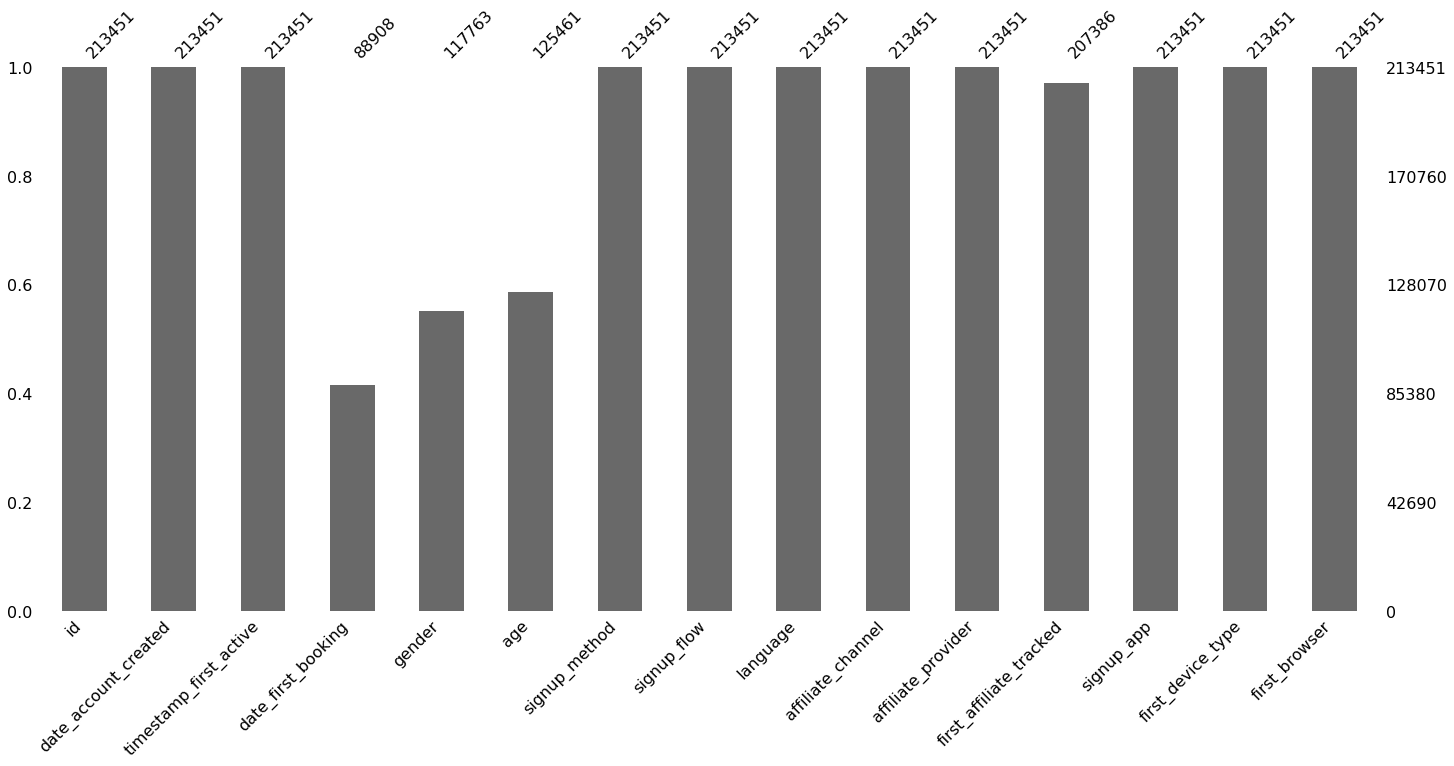

In [8]:
msno.bar(X_trn)

Based on the analysis so far, we could give conclusions:
1. There are missing data in `date_first_booking`, `gender`, `age` columns. 
2. The `date_first_booking`: date of first booking, does not seem to be related to our study, so we will drop it.
3. `timestamp_first_active`: timestamp of the first activity, which could user's first visit of the website or first download of the app. We do not think it is helpful for destination contribution, so we will drop this column as well later. 

## Naive way - RandomForest

In this part, we use the method mentioned in the class to train the model.


In [9]:
# Import necessary packages
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report,roc_curve,roc_auc_score
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import os
from sklearn.metrics import confusion_matrix
# fill missing value
import missingno as msno
from sklearn.model_selection import GridSearchCV
# Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#classifiers
from sklearn.ensemble import RandomForestClassifier

Using TensorFlow backend.
/Users/lixuanqi/.local/share/virtualenvs/neu-info6105-avengers-airbnb-j4ZrBWpX/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/lixuanqi/.local/share/virtualenvs/neu-info6105-avengers-airbnb-j4ZrBWpX/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/lixuanqi/.local/share/virtualenvs/neu-info6105-avengers-airbnb-j4ZrBWpX/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version o

In [10]:
path = os.getcwd()
data_folder = f'{path}/data'

In [11]:
# Load dataset
train_users = pd.read_csv(f'{data_folder}/train_users_2.csv')
test_users = pd.read_csv(f'{data_folder}/test_users.csv')

In [12]:
train_users.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


### Preprocessing

In [13]:
# Split X_trn and Y
Y_train_valid = train_users['country_destination']
X_train_valid = train_users.drop(['country_destination'], axis=1)
X_test = test_users
X_train_valid.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome


In [14]:
# We found there is '-unknown-' in 'gender', we will fill them with NaN firstly.
X_train_valid.gender.replace('-unknown-', np.nan, inplace=True)
X_test.gender.replace('-unknown-', np.nan, inplace=True)
X_train_valid.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,NaN,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,NaN,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox


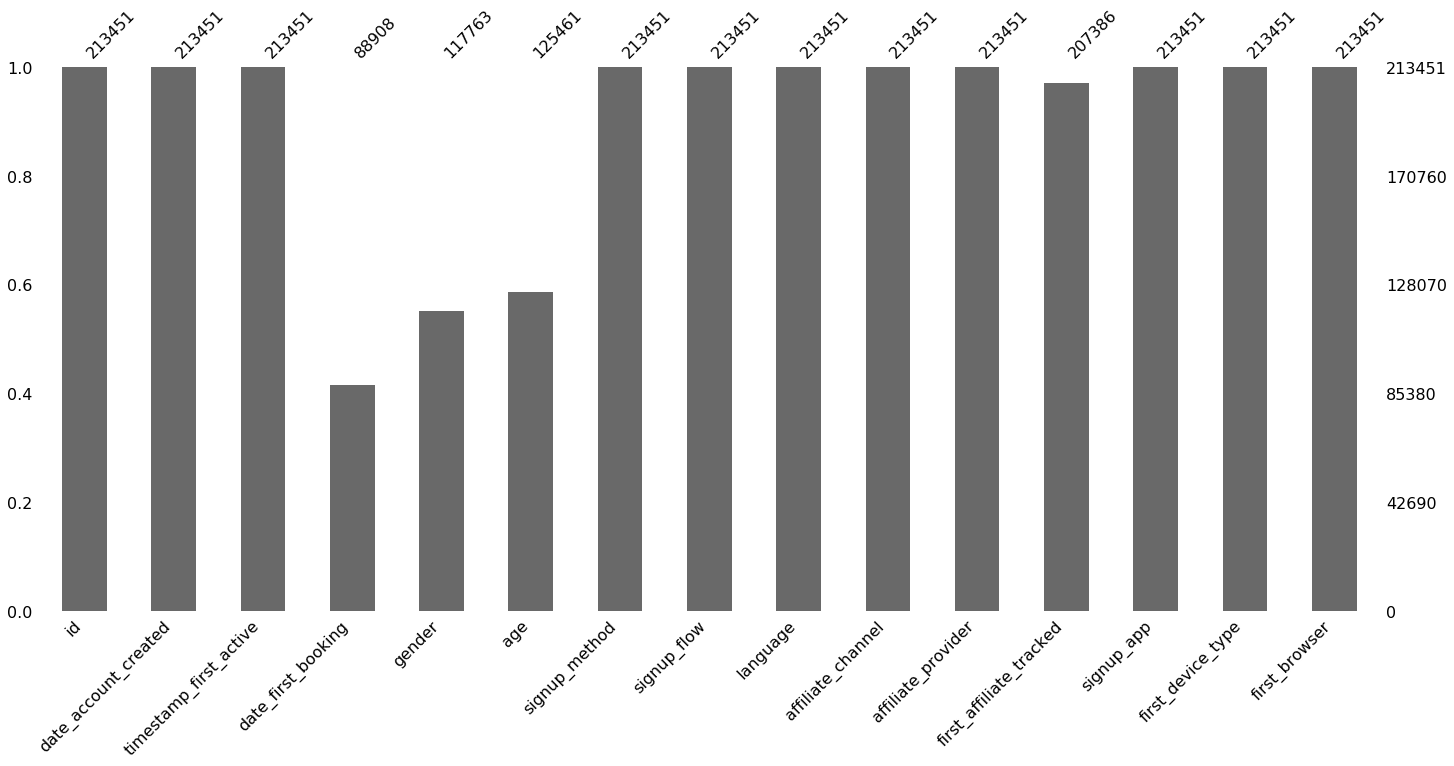

In [15]:
msno.bar(X_train_valid)

Conclusion:
1. There are missing data in `date_first_booking`, `gender`, `age` columns. 
2. The `date_first_booking` seems not related to the feature that we want to predict, so we drop it.

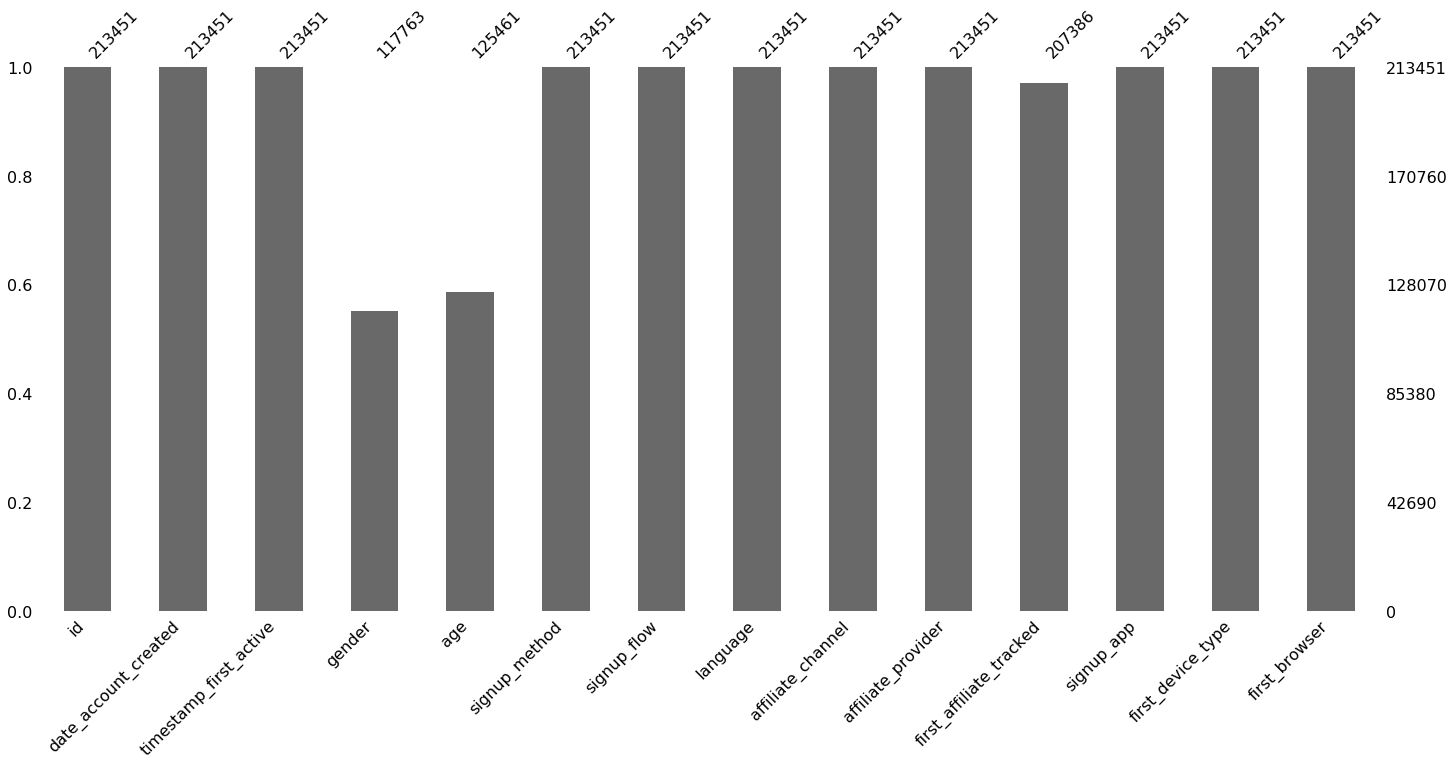

In [16]:
X_train_valid = X_train_valid.drop(['date_first_booking'], axis=1)
X_test = X_test.drop(['date_first_booking'], axis=1)
msno.bar(X_train_valid)

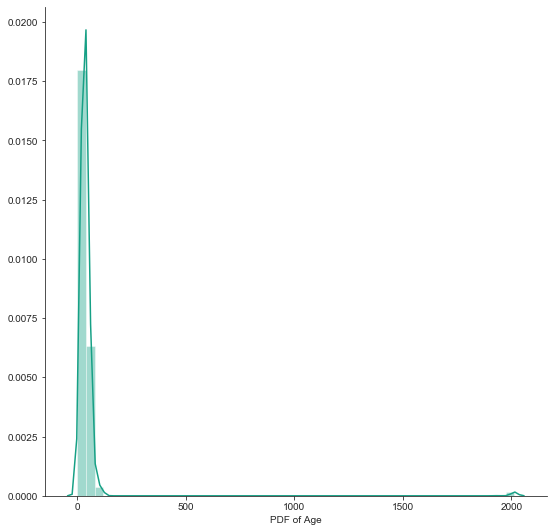

In [17]:
def draw_age_distplot(data):
    sns.set_style('ticks')
    fig, axis = plt.subplots()
    fig.set_size_inches(9, 9)
    sns.distplot(data.age.dropna(), color='#16A085')
    plt.xlabel('PDF of Age')
    sns.despine()
    
draw_age_distplot(X_train_valid)

Conclusion: 
1. some values are incorrect, we will drop them.

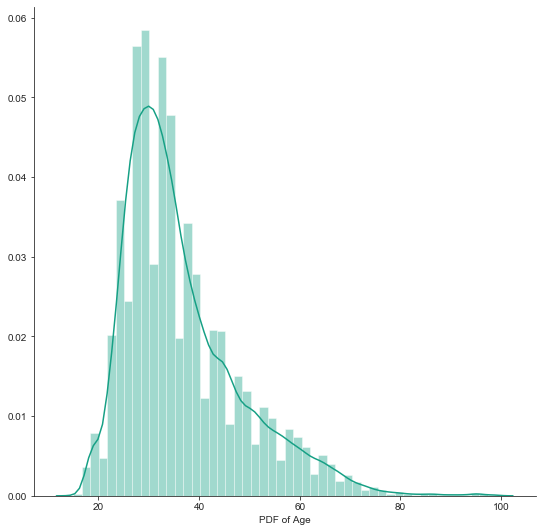

In [18]:
# fill the ages that not in (5, 100) range with NaN
def fill_wrong_age(data):
    data['age'] = data['age'].apply(lambda age : age if 5 < age < 100 else np.nan)
    
fill_wrong_age(X_train_valid)
fill_wrong_age(X_test)
draw_age_distplot(X_train_valid)

In [19]:
X_train_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 14 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
gender                     117763 non-null object
age                        123033 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 22.8+ MB


Discover:
1. The `date_account_created` is string type, we need transform it.
2. We need transform string type to category type.

In [20]:
# Date is split into 3 parts as year, month and day in both test and train. These are added as
# new features in both test and train

def split_date_to_three_columns(data):

    date_acc_created = np.vstack(data.date_account_created.astype(str).apply(
            lambda X_trn: list(map(int, X_trn.split('-')))).values)
    data['created_year'] = date_acc_created[:,0]
    data['created_month'] = date_acc_created[:,1]
    data['created_day'] = date_acc_created[:,2]
    data = data.drop(['date_account_created'], axis=1)
    return data

In [21]:
X_train_valid = split_date_to_three_columns(X_train_valid)
X_test = split_date_to_three_columns(X_test)

In [22]:
X_train_valid.head(5)

,id,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,created_year,created_month,created_day
0,gxn3p5htnn,20090319043255,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,6,28
1,820tgsjxq7,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,2011,5,25
2,4ft3gnwmtx,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,2010,9,28
3,bjjt8pjhuk,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,2011,12,5
4,87mebub9p4,20091208061105,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,9,14


In [23]:
# string => category
def str_to_cat(data):
    for k, v in data.items():
        if is_string_dtype(v):
            data[k] = v.astype('category').cat.as_ordered()
    return data

def cat_to_num(data):
    for k, v in data.items():
        if not is_numeric_dtype(v):
            data[k] = v.cat.codes + 1
    return data

In [24]:
X_train_valid = str_to_cat(X_train_valid)
X_test = str_to_cat(X_test)
print(X_train_valid.id.cat.categories)

X_train_valid = cat_to_num(X_train_valid)
X_test = cat_to_num(X_test)
print(X_train_valid.info())

Index(['00023iyk9l', '0005ytdols', '000guo2307', '000wc9mlv3', '0012yo8hu2',
       '001357912w', '001nvbxsvp', '001wyh0pz8', '001xf4efvm', '001y3jr7xc',
       ...
       'zzxi0fjaal', 'zzxlft4pc7', 'zzxxl4cftb', 'zzy7t0y9cm', 'zzyq03wcsh',
       'zzysuoqg6x', 'zzyt9q2s9k', 'zzywmcn0jv', 'zzyx3uud3s', 'zzzlylp57e'],
      dtype='object', length=213451)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null int32
timestamp_first_active     213451 non-null int64
gender                     213451 non-null int8
age                        123033 non-null float64
signup_method              213451 non-null int8
signup_flow                213451 non-null int64
language                   213451 non-null int8
affiliate_channel          213451 non-null int8
affiliate_provider         213451 non-null int8
first_affiliate_tracked    213451 non-null int8
signup_app                 213451 non-null int

In [25]:
X_train_valid.head(5)

,id,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,created_year,created_month,created_day
0,100523,20090319043255,0,NaN,2,0,6,3,5,7,3,4,9,2010,6,28
1,48039,20090523174809,2,38.0,2,0,6,8,9,7,3,4,9,2011,5,25
2,26485,20090609231247,1,56.0,1,3,6,3,5,7,3,7,22,2010,9,28
3,68504,20091031060129,1,42.0,2,0,6,3,5,7,3,4,18,2011,12,5
4,48956,20091208061105,0,41.0,1,0,6,3,5,7,3,4,9,2010,9,14


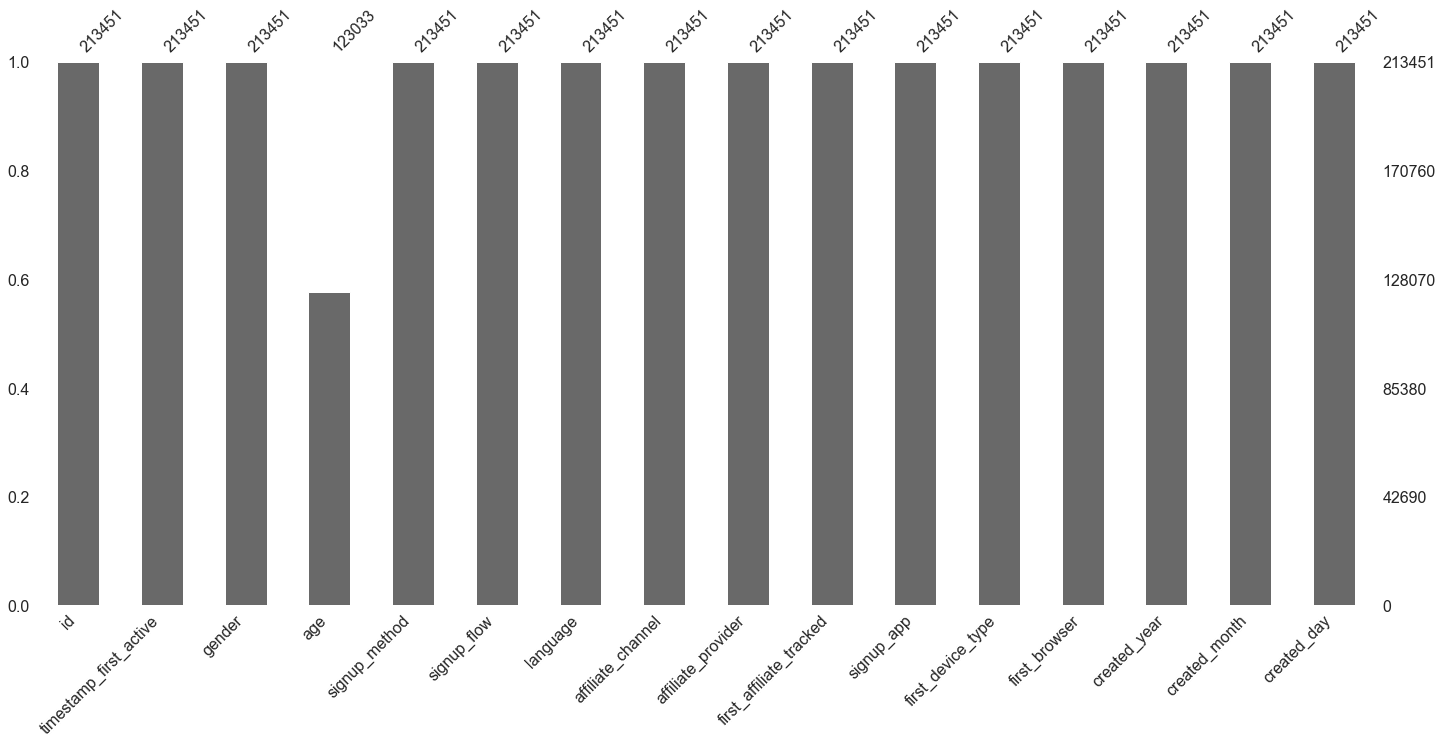

In [26]:
msno.bar(X_train_valid)

In [27]:
# Fill missing age columns
def fill_missing_age(data):
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    columns = data.columns
    return pd.DataFrame(imp.fit_transform(data), columns=columns)

X_train_valid = fill_missing_age(X_train_valid)
X_test = fill_missing_age(X_test)
X_train_valid.head(3)

,id,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,created_year,created_month,created_day
0,100523.0,2.009032e+13,0.0,36.545805,2.0,0.0,6.0,3.0,5.0,7.0,3.0,4.0,9.0,2010.0,6.0,28.0
1,48039.0,2.009052e+13,2.0,38.000000,2.0,0.0,6.0,8.0,9.0,7.0,3.0,4.0,9.0,2011.0,5.0,25.0
2,26485.0,2.009061e+13,1.0,56.000000,1.0,3.0,6.0,3.0,5.0,7.0,3.0,7.0,22.0,2010.0,9.0,28.0


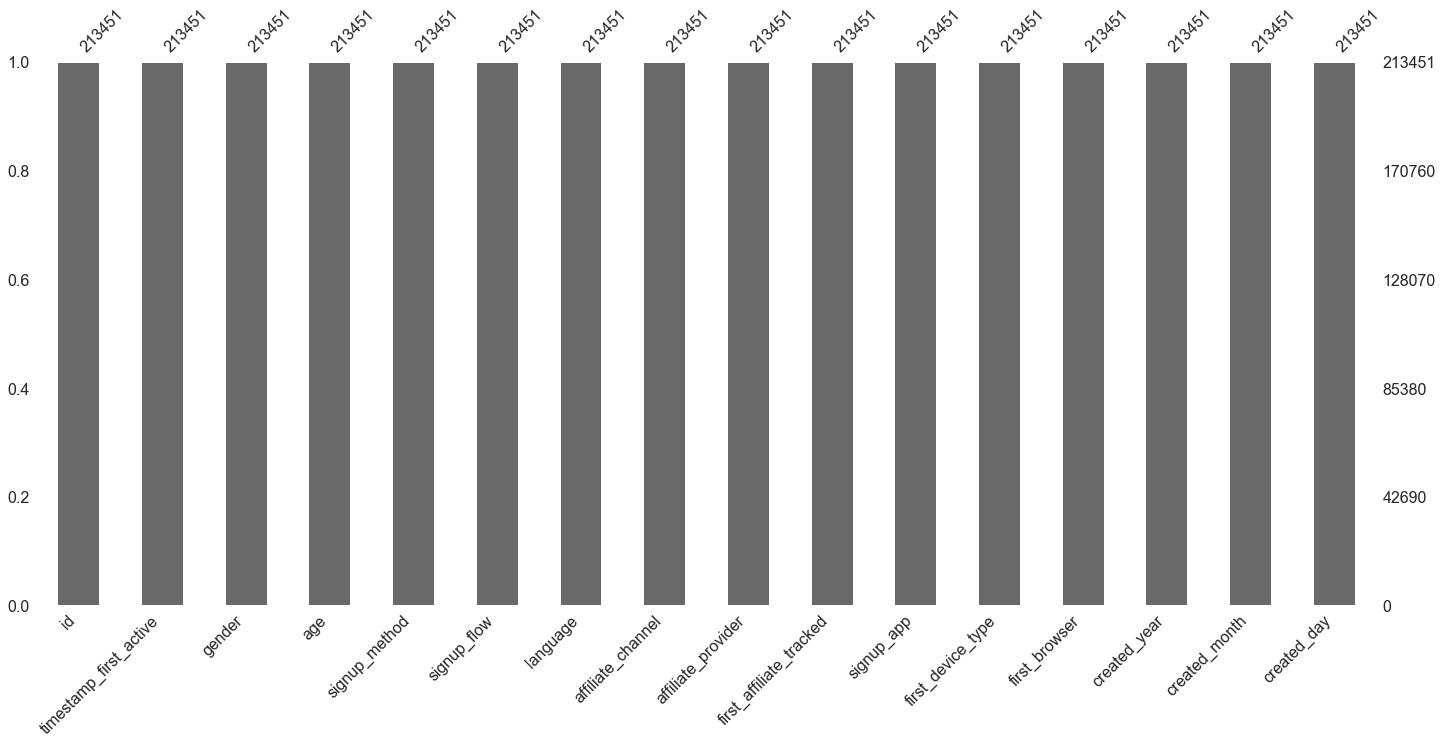

In [28]:
msno.bar(X_train_valid)

In [29]:
# Scaling
def scale(data):
    scaler = StandardScaler()
    scaler.fit(data)
    columns = data.columns
    return pd.DataFrame(scaler.transform(data), columns=columns)

X_train_valid = scale(X_train_valid)
X_test = scale(X_test)
X_train_valid.head(5)

,id,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,created_year,created_month,created_day
0,-0.100669,-4.380020,-0.987150,1.605953e-15,1.559666,-0.427798,-0.139772,-0.508867,-0.589495,0.853211,-0.018455,-0.928434,-0.754483,-3.222044,-0.006939,1.387946
1,-0.952433,-4.357961,1.452068,1.643370e-01,1.559666,-0.427798,-0.139772,2.384576,0.956108,0.853211,-0.018455,-0.928434,-0.754483,-2.156499,-0.315897,1.044700
2,-1.302233,-4.348661,0.232459,2.198497e+00,-0.625500,-0.035009,-0.139772,-0.508867,-0.589495,0.853211,-0.018455,0.644693,0.169757,-3.222044,0.919936,1.387946
3,-0.620306,-4.303076,0.232459,6.163724e-01,1.559666,-0.427798,-0.139772,-0.508867,-0.589495,0.853211,-0.018455,-0.928434,-0.114625,-2.156499,1.846811,-1.243607
4,-0.937551,-4.283949,-0.987150,5.033636e-01,-0.625500,-0.427798,-0.139772,-0.508867,-0.589495,0.853211,-0.018455,-0.928434,-0.754483,-3.222044,0.919936,-0.213869


In [30]:
X_train_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null float64
timestamp_first_active     213451 non-null float64
gender                     213451 non-null float64
age                        213451 non-null float64
signup_method              213451 non-null float64
signup_flow                213451 non-null float64
language                   213451 non-null float64
affiliate_channel          213451 non-null float64
affiliate_provider         213451 non-null float64
first_affiliate_tracked    213451 non-null float64
signup_app                 213451 non-null float64
first_device_type          213451 non-null float64
first_browser              213451 non-null float64
created_year               213451 non-null float64
created_month              213451 non-null float64
created_day                213451 non-null float64
dtypes: float64(16)
memory usage: 26.1 MB


### train model with Random Forest

In [31]:
# Split train and validation dataset
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_valid, Y_train_valid, test_size=0.33, random_state=42)

In [32]:
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, Y_train)

In [33]:
print('train score: {}'.format(clf.score(X_train, Y_train)))
print('validation score: {}'.format(clf.score(X_valid, Y_valid)))

train score: 0.9779109445361228
validation score: 0.5893326140348386


Conclusion:
1. The model is overfit, we will tune the hyperparameter.

### Hyperparameter tuning

In [34]:
parameters = {
    'n_estimators': range(10, 50, 10), 
    'max_depth': range(1, 5)
}

rf = RandomForestClassifier()
clf = GridSearchCV(rf, parameters, cv=5)
# we use the train and validation data together here, because the clf will do the cross validation internally.
clf.fit(X_train_valid, Y_train_valid)

print(clf.best_params_)


{'max_depth': 1, 'n_estimators': 40}


In [35]:
rf_model = RandomForestClassifier(**clf.best_params_)
rf_model.fit(X_train_valid, Y_train_valid)

print('score for train and validation data: {}'.format(rf_model.score(X_train_valid, Y_train_valid)))
print('score for train  data: {}'.format(rf_model.score(X_train, Y_train)))
print('score forvalidation data: {}'.format(rf_model.score(X_valid, Y_valid)))

score for train and validation data: 0.5834734904029496
score for train  data: 0.5848320420664
score forvalidation data: 0.5807152287795113


### predict

In [36]:
Y_pred = rf_model.predict(X_test)

In [37]:
test_users = pd.read_csv(f'{data_folder}/test_users.csv')
ids = test_users['id']
ids.head(5)

# Save prediction in CSV file.
sub = pd.DataFrame(
    np.column_stack((ids, Y_pred)), columns=['id', 'country'])
sub.to_csv(f'{data_folder}/submission_naive.csv', index=False)

## Better way - session feature extraction + XGBoost

This way refers to some kernels on the internet.

### Ideas
1. we found there are csv files related to countries, age and sessions. The users' behaviour are related to session data strongly. so we try to extract the session feature and join with the user data.
2. Ensemble modeling is magic for kaggle questions. Many kernels use it to get better scores. We choose XGBoost in our case to improve the model.

### Steps
1. extract session feature
2. proprecess data
3. train model
4. predict

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import collections
import os
import datetime

### Extract session feature
In this part, we get two informations from session feature.
1. For categorical columns, we get frequency.
2. For numerical columns, we get simple distribution statistics

There are 10.6 million rows in session.csv and it takes a long time to run this step. So we store the output on the disk for further using. The output filename is `session_features.csv`

In [2]:
OUTPUT_TO_CSV_FILE = 'session_features.csv'  # Results will be saved here.

INDEX_COLUMN = 'user_id'
SECS_ELAPSED_NUMERICAL = 'secs_elapsed'
CATEGORICAL_FEATURES = ['action', 'action_type', 'action_detail', 'device_type']

# A parameter to speed-up computation. Categorical values that appear
# less than the threshold will be removed.
VALUE_THRESHOLD = 0.005

In [3]:
def remove_rare_values_inplace(df_frame, column_list, threshold):
    """ Remove rare values.
    """
    insignificant_population = int(np.floor(threshold * len(df_frame)))
    for cat in column_list:
        freqs = collections.Counter(df_frame[cat])
        other = [i for i in freqs if freqs[i] < insignificant_population]
        for i in other:
            df_frame[cat].replace(i, 'other', inplace=True)

def extract_frequency_counts(pd_frame, column_list):
    """ Extract frequency counts from pd_frame.
    For each index (that correspond to a user) this method will count the
    number of times that C == Ci, where C is a column in column_list, and Ci
    is a unique value of that column. The arg olumn_list is assumed
    to contain categorical columns.
    """
    df_extracted_sessions = []
    for col in column_list:
        for val in set(pd_frame[col]):
            print('Extracting frequency counts for ({} == {})'.format(col, val))
            tmp_df = pd_frame.groupby(pd_frame.index).apply(
                lambda group, x=col, y=val: np.sum(group[x] == y))
            tmp_df.name = '%s=%s' % (col, val)
            df_extracted_sessions.append(tmp_df)
    frequency_counts = pd.concat(df_extracted_sessions, axis=1)
    return frequency_counts


def extract_distribution_stats(pd_frame, numerical_col):
    """ Extract simple distribution statistics from a numerical column.
    """
    tmp_df = pd_frame[numerical_col].groupby(pd_frame.index).aggregate(
        [np.mean, np.std, np.median, stats.skew])
    tmp_df.columns = ['%s_%s'% (numerical_col, i) for i in tmp_df.columns]
    return tmp_df

In [4]:
"""
Extract frequency counts from categorical columns and simple distribution
statistics from numerical ones.
"""
# Load basic training and testing data, from CSV file.
sessions = pd.read_csv(os.getcwd() + '/data/sessions.csv')
sessions.set_index(INDEX_COLUMN, inplace=True)
sessions.fillna(-1, inplace=True)
# Extract features from sessions.
remove_rare_values_inplace(sessions, CATEGORICAL_FEATURES, VALUE_THRESHOLD)
frequency_counts = extract_frequency_counts(sessions, CATEGORICAL_FEATURES)
simple_stats = extract_distribution_stats(sessions, SECS_ELAPSED_NUMERICAL)
# Save new data.
session_data = pd.concat((frequency_counts, simple_stats), axis=1)
session_data.fillna(-1, inplace=True)
session_data.to_csv(OUTPUT_TO_CSV_FILE)

Extracting frequency counts for (action == similar_listings_v2)
Extracting frequency counts for (action == edit)
Extracting frequency counts for (action == requested)
Extracting frequency counts for (action == ajax_refresh_subtotal)
Extracting frequency counts for (action == update)
Extracting frequency counts for (action == unavailabilities)
Extracting frequency counts for (action == track_page_view)
Extracting frequency counts for (action == dashboard)
Extracting frequency counts for (action == other)
Extracting frequency counts for (action == similar_listings)
Extracting frequency counts for (action == personalize)
Extracting frequency counts for (action == header_userpic)
Extracting frequency counts for (action == confirm_email)
Extracting frequency counts for (action == create)
Extracting frequency counts for (action == identity)
Extracting frequency counts for (action == active)
Extracting frequency counts for (action == qt2)
Extracting frequency counts for (action == social_conn

### Preproprecess data
In this part, we preprocess the data before training, we also store the output on the disk.
The output files:
1. training_features.csv
2. testing_features.csv
3. labels.csv

In [5]:
# Load dataset
data_path = os.getcwd() + '/data'
training_data = pd.read_csv(f'{data_path}/train_users_2.csv', index_col=0)
test_data = pd.read_csv(f'{data_path}/test_users.csv', index_col=0)

# Split features(X) and labels(Y)
LABEL = 'country_destination'
labels = training_data[LABEL].copy()
training_data.drop(LABEL, inplace=True, axis=1)

features = pd.concat((training_data, test_data), axis=0)
features.fillna(-1, inplace=True)

In [6]:
features.head(5)

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
id,,,,,,,,,,,,,,
gxn3p5htnn,2010-06-28,20090319043255,-1,-unknown-,-1.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
820tgsjxq7,2011-05-25,20090523174809,-1,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome


In [7]:
labels.head(5)

id
gxn3p5htnn      NDF
820tgsjxq7      NDF
4ft3gnwmtx       US
bjjt8pjhuk    other
87mebub9p4       US
Name: country_destination, dtype: object

In [8]:
# Removing rare values
CATEGORICAL_FEATURES = ['affiliate_channel', 'affiliate_provider',
                        'first_affiliate_tracked', 'first_browser',
                        'first_device_type', 'gender', 'language', 'signup_app',
                        'signup_method', 'signup_flow']

remove_rare_values_inplace(features, CATEGORICAL_FEATURES, 0.001)

In [9]:
# One-Hot-Encoding

def apply_one_hot_encoding(pd_frame, column_list):
    new_column_list = []
    for col in column_list:
        tmp = pd.get_dummies(pd_frame[col], prefix=col)
        new_column_list.append(tmp)
    new_pd_frame = pd.concat(new_column_list+[pd_frame], axis=1)
    new_pd_frame.drop(column_list, inplace=True, axis=1)
    return new_pd_frame

print(features.info())
features = apply_one_hot_encoding(features, CATEGORICAL_FEATURES)
print(features.info())

<class 'pandas.core.frame.DataFrame'>
Index: 275547 entries, gxn3p5htnn to 9uqfg8txu3
Data columns (total 14 columns):
date_account_created       275547 non-null object
timestamp_first_active     275547 non-null int64
date_first_booking         275547 non-null object
gender                     275547 non-null object
age                        275547 non-null float64
signup_method              275547 non-null object
signup_flow                275547 non-null object
language                   275547 non-null object
affiliate_channel          275547 non-null object
affiliate_provider         275547 non-null object
first_affiliate_tracked    275547 non-null object
signup_app                 275547 non-null object
first_device_type          275547 non-null object
first_browser              275547 non-null object
dtypes: float64(1), int64(1), object(12)
memory usage: 31.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 275547 entries, gxn3p5htnn to 9uqfg8txu3
Data columns (total 84 col

In [10]:
# Extract Date
def _parse_date(date_str, format_str):
    time_dt = datetime.datetime.strptime(date_str, format_str)
    return [time_dt.year, time_dt.month, time_dt.day, time_dt.weekday()]

def extract_dates_inplace(features, date_column):
    extracted_vals = np.vstack(features[date_column].apply(
        (lambda x: _parse_date(x, '%Y-%m-%d'))))
    for i, period in enumerate(['year', 'month', 'day', 'weekday']):
        features['%s_%s' % (date_column, period)] = extracted_vals[:, i]
    features.drop(date_column, inplace=True, axis=1)

extract_dates_inplace(features, 'date_account_created')

In [11]:
# As analytics in data exploration part, drop the unrelated columns
features.drop(['timestamp_first_active', 'date_first_booking'], inplace=True, axis=1)
features.head(5)

,affiliate_channel_api,affiliate_channel_content,affiliate_channel_direct,affiliate_channel_other,affiliate_channel_remarketing,affiliate_channel_sem-brand,affiliate_channel_sem-non-brand,affiliate_channel_seo,affiliate_provider_bing,affiliate_provider_craigslist,...,signup_flow_12,signup_flow_23,signup_flow_24,signup_flow_25,signup_flow_other,age,date_account_created_year,date_account_created_month,date_account_created_day,date_account_created_weekday
id,,,,,,,,,,,,,,,,,,,,,
gxn3p5htnn,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,-1.0,2010,6,28,0
820tgsjxq7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,38.0,2011,5,25,2
4ft3gnwmtx,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,56.0,2010,9,28,1
bjjt8pjhuk,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,42.0,2011,12,5,0
87mebub9p4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,41.0,2010,9,14,1


In [13]:
# Load Session data
sessions = pd.read_csv(f'{data_path}/session_features.csv', index_col=0)
sessions.head(5)

,action=similar_listings_v2,action=edit,action=requested,action=ajax_refresh_subtotal,action=update,action=unavailabilities,action=track_page_view,action=dashboard,action=other,action=similar_listings,...,device_type=-unknown-,device_type=Tablet,device_type=iPhone,device_type=other,device_type=Mac Desktop,device_type=Windows Desktop,secs_elapsed_mean,secs_elapsed_std,secs_elapsed_median,secs_elapsed_skew
user_id,,,,,,,,,,,,,,,,,,,,,
00023iyk9l,0,0,5,2,0,0,0,4,4,3,...,0,0,4,0,36,0,21697.375000,91120.253083,843.0,5.604319
0010k6l0om,8,0,0,8,0,0,0,2,3,0,...,0,0,0,0,63,0,9310.190476,22598.464587,847.0,3.550714
001wyh0pz8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,3144.044444,6541.232094,1104.0,4.913634
0028jgx1x1,0,0,0,0,0,0,0,0,0,0,...,30,0,0,0,0,0,9580.935484,17791.437472,489.0,2.864292
002qnbzfs5,0,0,0,0,13,21,0,2,97,0,...,14,0,775,0,0,0,8221.899873,58074.501937,498.0,19.436206


In [14]:
# Join features and sessions
features = pd.concat((features, sessions), axis=1)
features.fillna(-1, inplace=True)
features.head(5)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,affiliate_channel_api,affiliate_channel_content,affiliate_channel_direct,affiliate_channel_other,affiliate_channel_remarketing,affiliate_channel_sem-brand,affiliate_channel_sem-non-brand,affiliate_channel_seo,affiliate_provider_bing,affiliate_provider_craigslist,...,device_type=-unknown-,device_type=Tablet,device_type=iPhone,device_type=other,device_type=Mac Desktop,device_type=Windows Desktop,secs_elapsed_mean,secs_elapsed_std,secs_elapsed_median,secs_elapsed_skew
00023iyk9l,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,4.0,0.0,36.0,0.0,21697.375000,91120.253083,843.0,5.604319
0005ytdols,0,0,1,0,0,0,0,0,0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.000000
000guo2307,0,0,1,0,0,0,0,0,0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.000000
000wc9mlv3,0,0,1,0,0,0,0,0,0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.000000
0010k6l0om,0,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,63.0,0.0,9310.190476,22598.464587,847.0,3.550714


In [15]:
# Save data for training model
training = features.ix[training_data.index]
testing = features.ix[test_data.index]

assert set(training.index) == set(labels.index)
training.to_csv(f'{data_path}/training_features.csv', header=True)
testing.to_csv(f'{data_path}/testing_features.csv', header=True)
labels.to_csv(f'{data_path}/labels.csv', header=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


### train model
This code used 4 classifiers: 
1. XGB trained on all (training) data 
2. RandomForests trained on all data 
3. XGB classifier trained on recent (aka fresh) data only
4. RandomForests trained on all data only. 

The results from each clasifier formed the final prediction via weighted voting.

In [16]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost.sklearn import XGBClassifier
import os

In [17]:
# Load datasets
data_path = os.getcwd() + '/data'

training_data = pd.read_csv(f'{data_path}/training_features.csv', index_col=0)
testing_data = pd.read_csv(f'{data_path}/testing_features.csv', index_col=0)
labels_data = pd.read_csv(f'{data_path}/labels.csv', index_col=0)

assert set(training_data.index) == set(labels_data.index)

In [18]:
DEPTH_XGB, ESTIMATORS_XGB, LEARNING_XGB, SUBSAMPLE_XGB, COLSAMPLE_XGB = (
    7, 60, 0.2, 0.7, 0.6)

ESTIMATORS_RF, CRITERION_RF, DEPTH_RF, MIN_LEAF_RF, JOBS_RF = (
    500, 'gini', 20, 8, 30) 

def predict(training, labels, testing, xgb_votes, rf_votes):
    predictions = np.zeros((len(testing), len(set(labels))))
    # Predictions using xgboost.
    for i in range(xgb_votes):
        print(f'XGB vote {i}')
        xgb = XGBClassifier(
            max_depth=DEPTH_XGB, learning_rate=LEARNING_XGB,
            n_estimators=ESTIMATORS_XGB, objective='multi:softprob',
            subsample=SUBSAMPLE_XGB, colsample_bytree=COLSAMPLE_XGB)
        xgb.fit(training, labels)
        predictions += xgb.predict_proba(testing)
    # Predictions using RandomForestClassifier.
    for i in range(rf_votes):
        print(f'RandomForest vote {i}')
        rand_forest = RandomForestClassifier(
            n_estimators=ESTIMATORS_RF, criterion=CRITERION_RF, n_jobs=JOBS_RF,
            max_depth=DEPTH_RF, min_samples_leaf=MIN_LEAF_RF, bootstrap=True)
        rand_forest.fit(training, labels)
        predictions += rand_forest.predict_proba(testing)
    return predictions

### Predict

In [23]:
# Predict with full data set
XGB_ALL_VOTE, RF_ALL_VOTE = 5, 2

encoder = LabelEncoder()
encoder.fit(labels_data['country_destination'])
predictions = np.zeros((len(testing_data), len(encoder.classes_)))
labels = encoder.transform(labels_data['country_destination'])
predictions += predict(
    training_data, labels, testing_data, XGB_ALL_VOTE, RF_ALL_VOTE)

XGB vote 0
XGB vote 1
XGB vote 2
XGB vote 3
XGB vote 4
RandomForest vote 0
RandomForest vote 1


In [24]:
# above step takes long time, store the predictions matrix into disk.
np.save("predictions_full_data",predictions)
predictions = np.load("predictions_full_data.npy")

In [25]:
# Predict with 'fresh' data
FRESH_DATA_YEAR = 2014
XGB_FRESH_VOTE, RF_FRESH_VOTE = 10, 4

train_fresh = training_data[training_data['date_account_created_year'] >= FRESH_DATA_YEAR]
labels_fresh = encoder.transform(labels_data.ix[train_fresh.index]['country_destination'])
predictions += predict(
    train_fresh, labels_fresh, testing_data, XGB_FRESH_VOTE, RF_FRESH_VOTE)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


XGB vote 0
XGB vote 1
XGB vote 2
XGB vote 3
XGB vote 4
XGB vote 5
XGB vote 6
XGB vote 7
XGB vote 8
XGB vote 9
RandomForest vote 0
RandomForest vote 1
RandomForest vote 2
RandomForest vote 3


In [26]:
# above step takes long time, store the predictions matrix into disk.
np.save("predictions_full_and_fresh_data",predictions)
predictions = np.load("predictions_full_and_fresh_data.npy")

In [27]:
# Use the 5 classes with highest scores.
ids, countries = ([], [])
for i in range(len(testing_data)):
    idx = testing_data.index[i]
    ids += [idx] * 5
    countries += encoder.inverse_transform(
        np.argsort(predictions[i])[::-1])[:5].tolist()

In [28]:
# Save prediction in CSV file.
sub = pd.DataFrame(
    np.column_stack((ids, countries)), columns=['id', 'country'])
sub.to_csv(f'{data_path}/submission.csv', index=False)